# **Example 3** Working with vertical profiles using the `ProfileData` class

In [1]:
!pip install earthcarekit
!pip install xarray
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.4/347.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.5/240.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import earthcarekit as eck
import numpy as np
import pandas as pd

/usr/local/lib/python3.12/dist-packages/earthcarekit/utils/config.py:488: UserWarning: Configuration of 'earthcarekit' is incomplete.

	Please create a custom configuration file (TOML).
	To do this you can follow these steps:

	1. Generate a template configuration file by running in your Python code:
	       >>> import earthcarekit as eck
	       >>> eck.create_example_config("path_to_file_or_dir")

	2. Edit the fields the generated file using a text editor.

	3. Finally to run in your Python code:
	       >>> eck.set_config("path_to_file")

	This will generate a file in your users home directory (see <~/.config/default_config.toml)>
	which will be used as the default configuration of 'earthcarekit'.

  warnings.warn(message=msg)


#### Configuration of earthcarekit and directories

In [2]:
from google.colab import drive
drive.mount("/content/drive")

DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/earthcare-amazon-2025/EarthCare_Amazon_2025/data/EC_data"
OUT_DIR  = "/content/drive/MyDrive/Colab Notebooks/earthcare-amazon-2025/EarthCare_Amazon_2025/outputs"
CFG_DIR  = "/content/drive/MyDrive/Colab Notebooks/earthcare-amazon-2025/EarthCare_Amazon_2025"

Mounted at /content/drive


In [3]:
path_to_file_esa_config = CFG_DIR+"/example_config.toml"#Configuration file for the esa package
eck.set_config(path_to_file_esa_config)


Default config set at </root/.config/earthcarekit/default_config.toml>


## **3.1** Initializing `ProfileData`

#### Creating a profile defined by the user

ProfileData(values=array([[0. , 0.4, 1. , 1. , 0.6, 0. ]]), height=array([    0.,  5000., 10000., 15000., 20000., 25000.]), time=array(['2025-01-01T00:00:00.000000000'], dtype='datetime64[ns]'), latitude=None, longitude=None, color=None, label=None, units=None, platform=None, error=None)

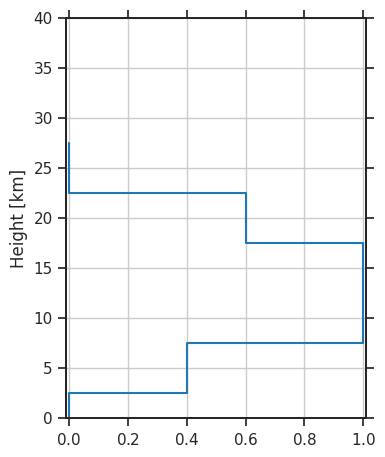

In [ ]:
# ProfileData has 3 required inputs:
# - values
# - height
# - time

p = eck.ProfileData(
    values=[[0, 0.4, 1, 1, 0.6, 0]],
    height=[0e3, 5e3, 10e3, 15e3, 20e3, 25e3],
    time=["2025-01-01T00:00"],
)
display(p)

# Plotting
pf = eck.ProfileFigure().plot(p)

#### Read already downloaded data

In [4]:
print("Search products of a full orbit:")
df = eck.search_product(
    file_type="ATL_EBD_2A",
    orbit_number=5813,
    root_dirpath=DATA_DIR,  # Select the notebook's folder as root directory
)
print(df.name)

Search products of a full orbit:
['ECA_EXBA_ATL_EBD_2A_20250606T125109Z_20250929T183956Z_05813A'
 'ECA_EXBA_ATL_EBD_2A_20250606T130244Z_20250929T181219Z_05813B'
 'ECA_EXBA_ATL_EBD_2A_20250606T131431Z_20250929T181615Z_05813C'
 'ECA_EXBA_ATL_EBD_2A_20250606T132535Z_20250929T184149Z_05813D'
 'ECA_EXBA_ATL_EBD_2A_20250606T133721Z_20250929T183909Z_05813E'
 'ECA_EXBA_ATL_EBD_2A_20250606T134857Z_20250929T174833Z_05813F'
 'ECA_EXBA_ATL_EBD_2A_20250606T140046Z_20250929T183128Z_05813G'
 'ECA_EXBA_ATL_EBD_2A_20250606T141153Z_20250929T184343Z_05813H']


Trying: with eck.read_products(df[:]) as ds


/usr/local/lib/python3.12/dist-packages/earthcarekit/utils/xarray_utils/concat.py:75: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_combined = xr.concat([ds1_padded, ds2_padded], dim=dim)


<xarray.Dataset> Size: 228MB
Dimensions:                                                         (
                                                                     along_track: 4820,
                                                                     vertical: 242,
                                                                     layer: 25,
                                                                     n_state: 351,
                                                                     concat_dim: 3)
Dimensions without coordinates: along_track, vertical, layer, n_state,
                                concat_dim
Data variables: (12/74)
    longitude                                                       (along_track) float64 39kB ...
    joint_standard_grid_index                                       (along_track) int32 19kB ...
    latitude                                                        (along_track) float64 39kB ...
    time                                                            (along_track) datetime64[ns] 39kB ...
    height                                                          (along_track, vertical) float32 5MB ...
    range                                                           (along_track, vertical) float32 5MB ...
    ...                                                              ...
    processing_start_time                                           (concat_dim) datetime64[ns] 24B ...
    sensing_start_time                                              (concat_dim) datetime64[ns] 24B ...
    frame_id                                                        (concat_dim) <U1 12B ...
    low_resolution_number_of_joint_standard_grid_pixels             (concat_dim) int16 6B ...
    orbit_and_frame                                                 (concat_dim) <U6 72B ...
    orbit_number                                                    (concat_dim) uint32 12B ...

df succesfully read


/usr/local/lib/python3.12/dist-packages/earthcarekit/utils/xarray_utils/concat.py:75: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_combined = xr.concat([ds1_padded, ds2_padded], dim=dim)


<xarray.Dataset> Size: 228MB
Dimensions:                                                         (
                                                                     along_track: 4820,
                                                                     vertical: 242,
                                                                     layer: 25,
                                                                     n_state: 351,
                                                                     concat_dim: 3)
Dimensions without coordinates: along_track, vertical, layer, n_state,
                                concat_dim
Data variables: (12/74)
    longitude                                                       (along_track) float64 39kB ...
    joint_standard_grid_index                                       (along_track) int32 19kB ...
    latitude                                                        (along_track) float64 39kB ...
    time                                                            (along_track) datetime64[ns] 39kB ...
    height                                                          (along_track, vertical) float32 5MB ...
    range                                                           (along_track, vertical) float32 5MB ...
    ...                                                              ...
    processing_start_time                                           (concat_dim) datetime64[ns] 24B ...
    sensing_start_time                                              (concat_dim) datetime64[ns] 24B ...
    frame_id                                                        (concat_dim) <U1 12B ...
    low_resolution_number_of_joint_standard_grid_pixels             (concat_dim) int16 6B ...
    orbit_and_frame                                                 (concat_dim) <U6 72B ...
    orbit_number                                                    (concat_dim) uint32 12B ...

ds successfully read


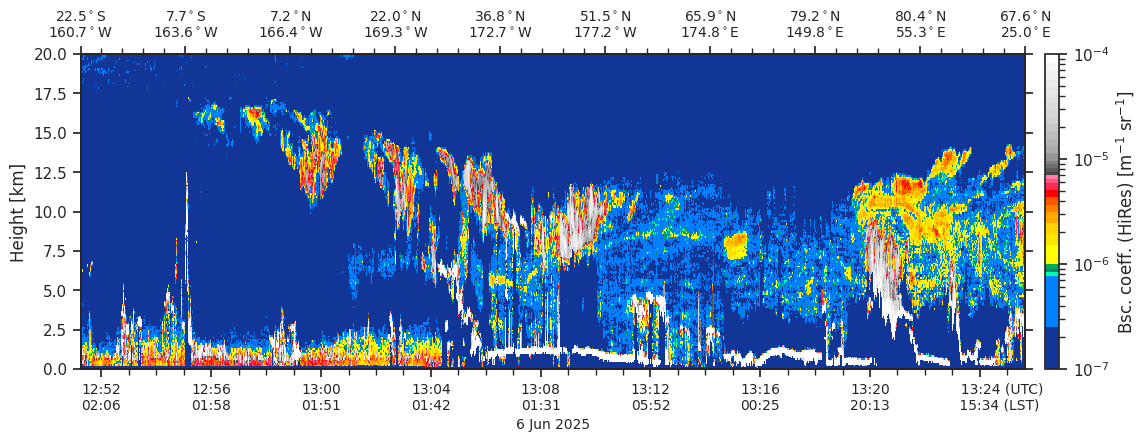

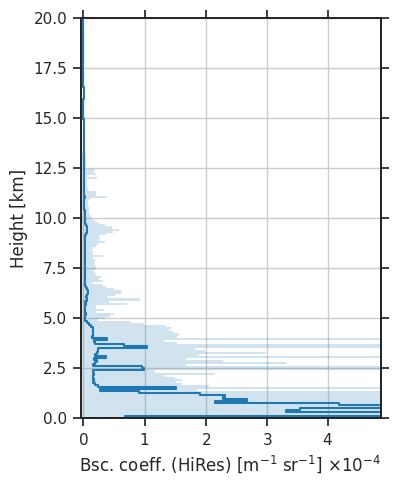

In [29]:
# Note: This cell requires external input data!
# Instead of manually creating ProfileData objects,
# they can be crated from xarray datasets:

# fp = r"./ECA_EXBA_ATL_EBD_2A_20240902T210023Z_20250721T110708Z_01508B.h5"  # Replace path with one of your local files
# Selecting one of the files from my data
#with eck.read_any(fp) as ds:


with eck.read_products(df[:3]) as ds:

    display(ds)
    print('ds successfully read')
    p = eck.ProfileData.from_dataset(ds, var="particle_backscatter_coefficient_355nm")  # Select a valid variable from the dataset

    # Plotting
    cf = eck.CurtainFigure().plot(p, log_scale=True, cmap="calipso", value_range=(1e-7, 1e-4), height_range=(0, 20e3))  # Custommize curtain plot settings
    pf = eck.ProfileFigure(height_range=(0, 20e3)).plot(p)

## **3.2** Single profiles

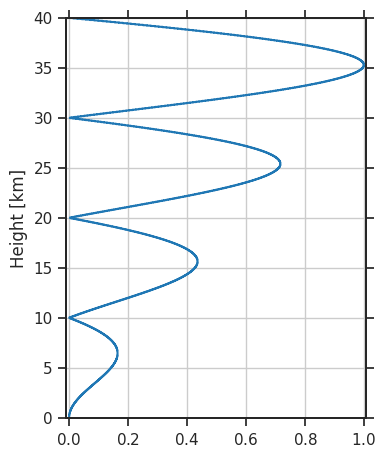

In [31]:
# Generating example data
nh = 1000  # Number of height bins
h = np.linspace(0, 40e3, nh)  # Height values in meters
v = np.abs(np.sin(np.linspace(np.pi*3, -np.pi, nh)) * h)  # Signal values
v = v / np.max(v)

p = eck.ProfileData(
    values=v,
    height=h,
    time=["2025-01-01T00:00"],
)

# Plotting
pf = eck.ProfileFigure().plot(p)

### **3.2.1** Select a height range

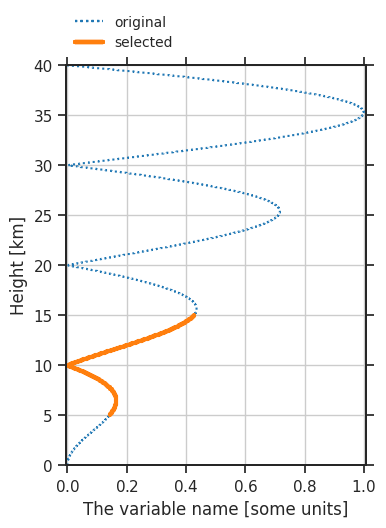

In [32]:
height_range = (5e3, 15e3)
p_selected = p.select_height_range(height_range)

# Plotting
pf = eck.ProfileFigure(label="The variable name", units="some units", show_legend=True, value_range=(0,1))
pf = pf.plot(p, linestyle="dotted", legend_label="original")
pf = pf.plot(p_selected, linewidth=3, legend_label="selected")

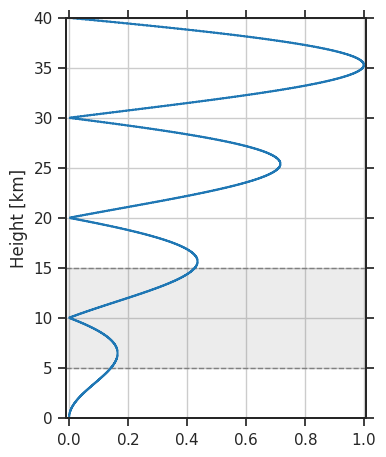

In [33]:
# Note: You can also mark the selected height range in the plot
pf = eck.ProfileFigure(value_range=(0,1))
pf = pf.plot(p, selection_height_range=(5e3, 15e3))

### **3.2.2** Rebin the profile to new height bin centers

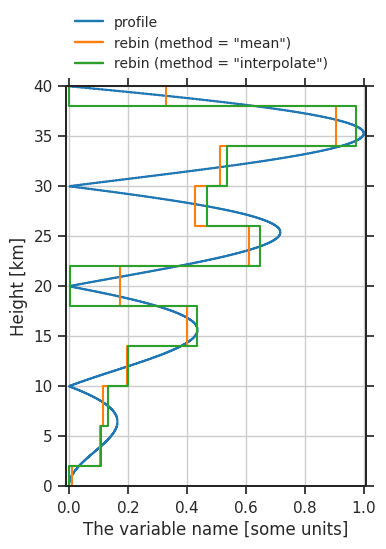

In [34]:
new_height = np.linspace(0,40e3,11)

p_rebin_mean = p.rebin_height(new_height)
p_rebin_interp = p.rebin_height(new_height, method="interpolate")

# Plotting
pf = eck.ProfileFigure(label="The variable name", units="some units", show_legend=True, value_range=(0,1))
pf = pf.plot(p, legend_label="profile")
pf = pf.plot(p_rebin_mean, legend_label='rebin (method = "mean")')
pf = pf.plot(p_rebin_interp, legend_label='rebin (method = "interpolate")')

### **3.2.3** Calculate statistics and compare profiles

In [35]:
results = p.stats()
display(results)

results2 = p.stats(height_range=(7_500, 12_500))
display(results2)

results3 = p.stats(height_range=(12_500, 17_500))
display(results3)

print("Create a dataframe:")
df = pd.concat([
    results.to_dataframe(),
    results2.to_dataframe(),
    results3.to_dataframe(),
])
display(df)

ProfileStatResults(hmin=0.0, hmax=40000.0, mean=0.3619352437163005, std=0.2874920456912103, mean_error=None)

ProfileStatResults(hmin=7500.0, hmax=12500.0, mean=0.10641148632038505, std=0.06351902633623104, mean_error=None)

ProfileStatResults(hmin=12500.0, hmax=17500.0, mean=0.3844924392396514, std=0.05015758171588792, mean_error=None)

Create a dataframe:


,hmin,hmax,mean,std,mean_error
0,0.0,40000.0,0.361935,0.287492,NaN
0,7500.0,12500.0,0.106411,0.063519,NaN
0,12500.0,17500.0,0.384492,0.050158,NaN


ProfileComparisonResults(hmin=0.0, hmax=40000.0, diff_of_means=-0.025692613658806207, mae=0.06688045047644385, rmse=0.11532266747463019, mean_diff=-0.025692613658806207, prediction=ProfileStatResults(hmin=0.0, hmax=40000.0, mean=0.34446779010986966, std=0.2519075907260285, mean_error=None), target=ProfileStatResults(hmin=0.0, hmax=40000.0, mean=0.31877517645106346, std=0.3039574180116909, mean_error=None))

,hmin,hmax,diff_of_means,mae,rmse,mean_diff,mean_prediction,std_prediction,mean_error_prediction,mean_target,std_target,mean_error_target
0,0.0,40000.0,-0.025693,0.06688,0.115323,-0.025693,0.344468,0.251908,NaN,0.318775,0.303957,NaN


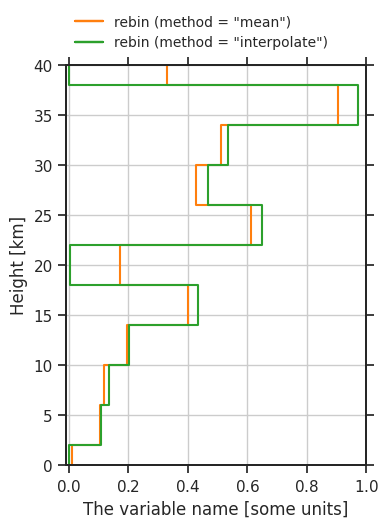

In [36]:
# Compare 2 profiles
# Note: Here we compare the 2 rebinned profiles from section 3.1.2 above.

results = p_rebin_mean.compare_to(p_rebin_interp)
display(results)
display(results.to_dataframe())

# Plotting
pf = eck.ProfileFigure(label="The variable name", units="some units", show_legend=True, value_range=(0,1))
pf = pf.plot(p_rebin_mean, legend_label='rebin (method = "mean")',color="tab:orange")
pf = pf.plot(p_rebin_interp, legend_label='rebin (method = "interpolate")',color="tab:green")

## **3.3** Multiple profiles (curtain)

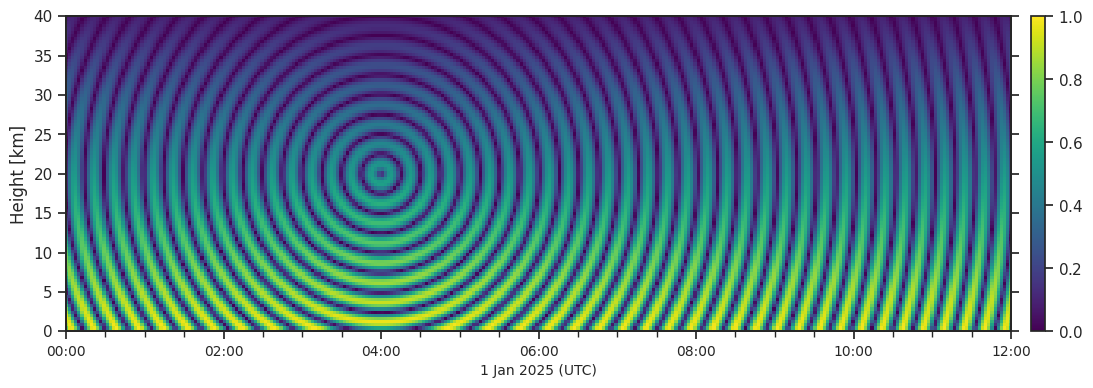

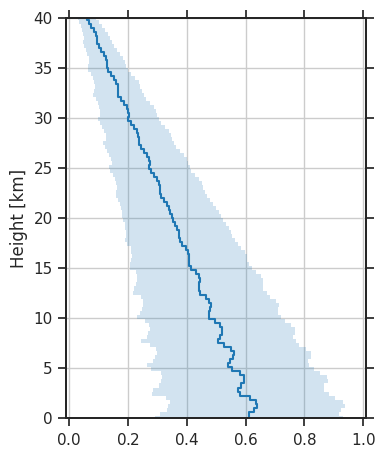

In [37]:
# Generating example data
nh = 100  # Number of height bins
h = np.linspace(0, 40e3, nh)

nt = 300  # Number of (temporal) samples
y = np.linspace(-0.5, 0.5, nh)
x = np.linspace(-1, 2, nt)
gx, gy = np.meshgrid(x, y)
r = np.sqrt(gx**2 + gy**2)
v = np.sin(50 * r).T
v = np.abs(v) * np.linspace(1, 0.1, nh)

p = eck.ProfileData(
    values=v,
    height=h,
    time=pd.date_range("20250101T00", "20250101T12", periods=nt),
)

# PLotting
cf = eck.CurtainFigure().plot(p, value_range=(0,1))
pf = eck.ProfileFigure().plot(p, value_range=(0,1))

### **3.3.1** Get mean profile

p.shape=(300, 100)
p_mean.shape=(1, 100)


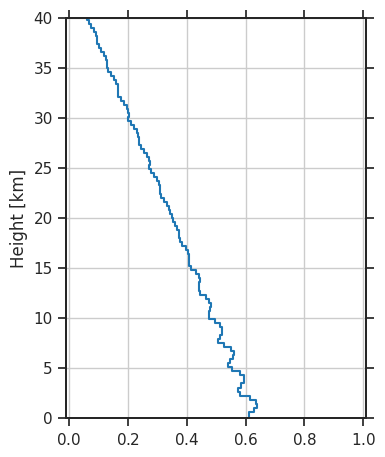

In [38]:
p_mean = p.mean()
print(f"{p.shape=}")
print(f"{p_mean.shape=}")

# Plotting
pf = eck.ProfileFigure().plot(p_mean, value_range=(0,1))

### **3.3.2** Apply rolling mean (or moving average)

p.shape=(300, 100)
p_roll.shape=(300, 100)


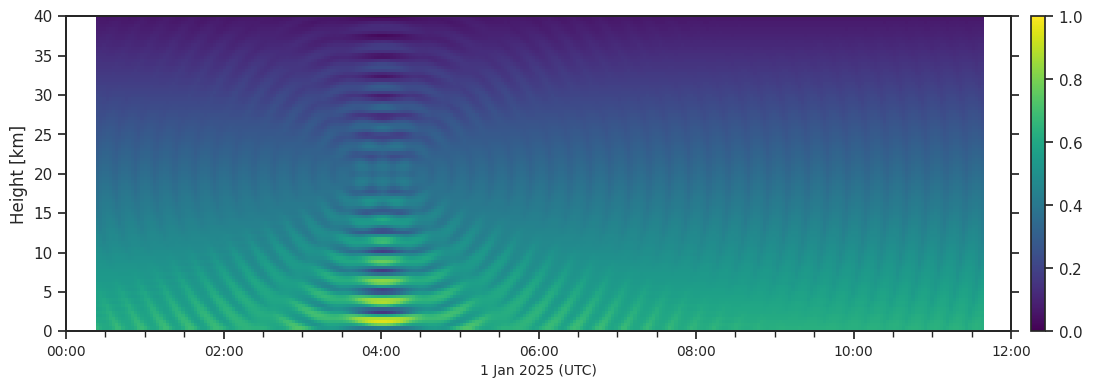

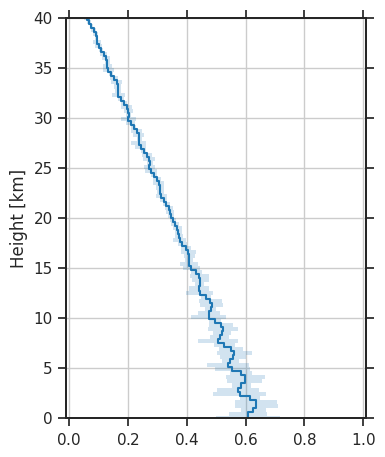

In [39]:
p_roll = p.rolling_mean(20, axis=0)
print(f"{p.shape=}")
print(f"{p_roll.shape=}")

# Plotting
cf = eck.CurtainFigure().plot(p_roll, value_range=(0,1))
pf = eck.ProfileFigure().plot(p_roll, value_range=(0,1))

### **3.3.3** Coarsen profiles

p.shape=(300, 100)
p_coarsened.shape=(15, 100)


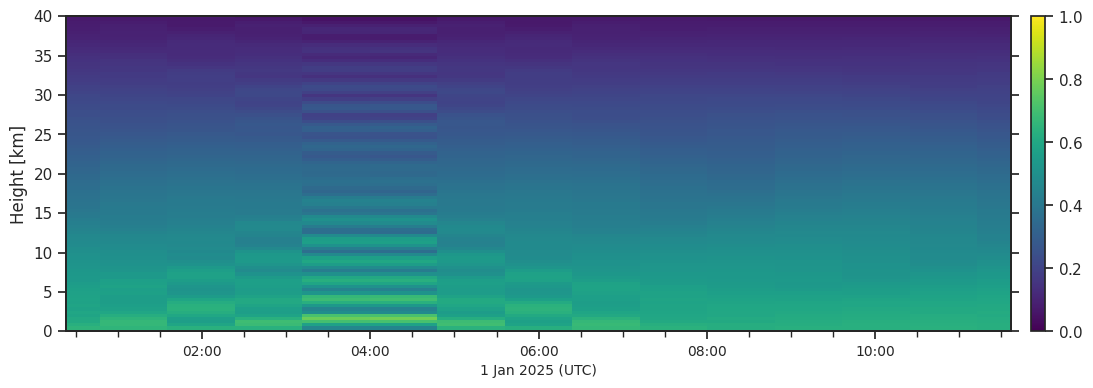

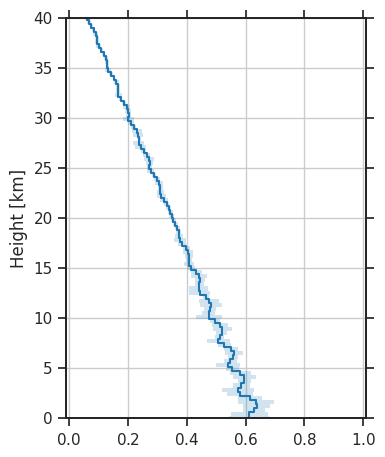

In [40]:
p_coarsened = p.coarsen_mean(20)
print(f"{p.shape=}")
print(f"{p_coarsened.shape=}")

# Plotting
cf = eck.CurtainFigure().plot(p_coarsened, value_range=(0,1))
pf = eck.ProfileFigure().plot(p_coarsened, value_range=(0,1))

### **3.3.4** Rebin to new height bins

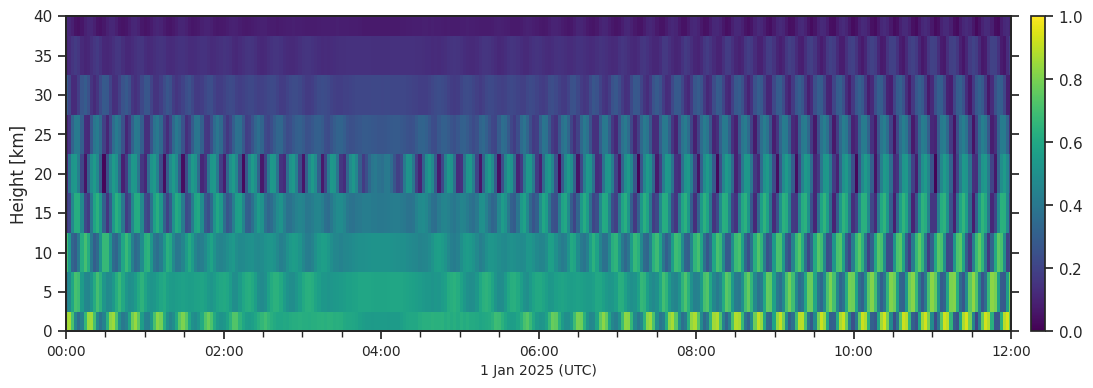

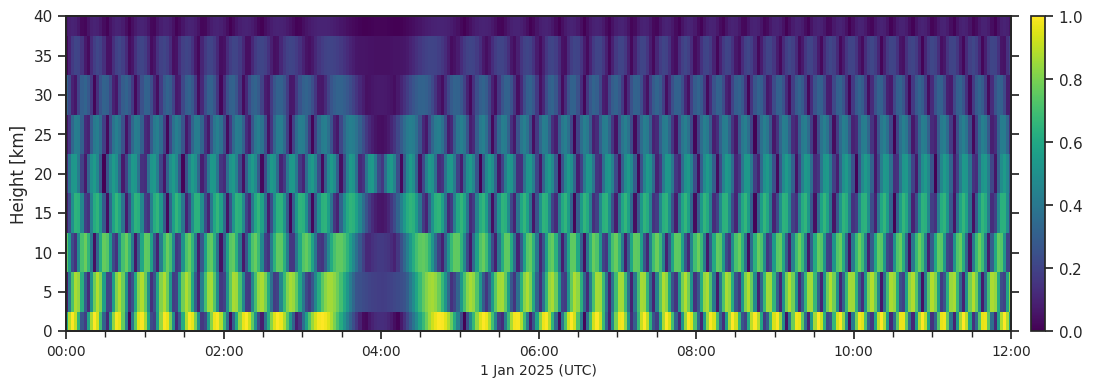

In [41]:
height_bin_centers = [0, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3, 40e3]
p_rebinned_height_mean = p.rebin_height(height_bin_centers)
p_rebinned_height_interp = p.rebin_height(height_bin_centers, method="interpolate")

# Plotting
cf = eck.CurtainFigure().plot(p_rebinned_height_mean, value_range=(0,1))
cf = eck.CurtainFigure().plot(p_rebinned_height_interp, value_range=(0,1))

### **3.3.4** Rebin to new time bins

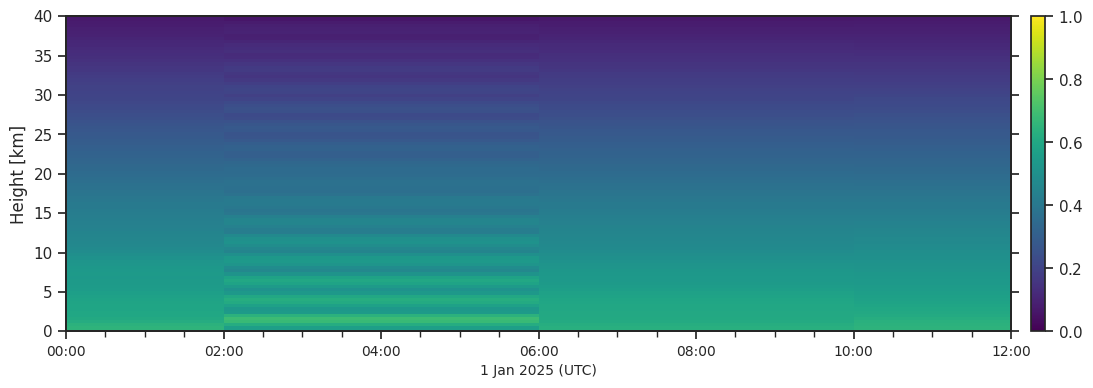

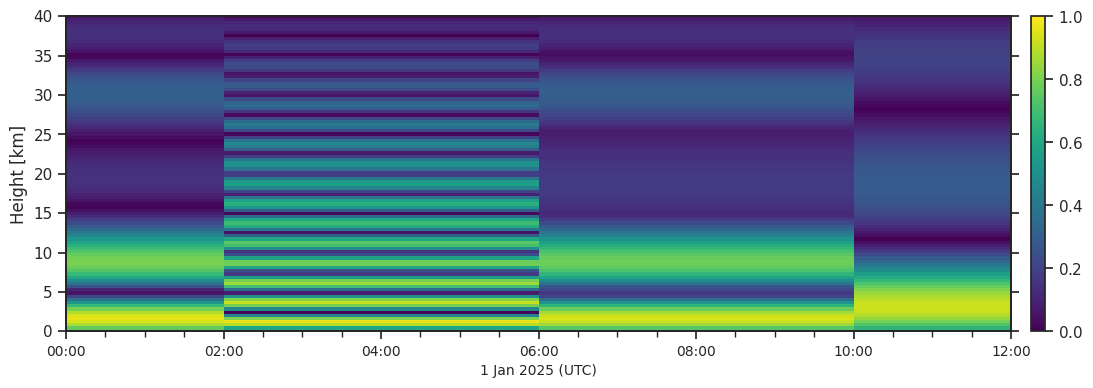

In [42]:
time_bin_centers = ["20250101T00", "20250101T04", "20250101T08", "20250101T12"]
p_rebinned_time_mean = p.rebin_time(time_bin_centers)
p_rebinned_time_interp = p.rebin_time(time_bin_centers, method="interpolate")

# Plotting
cf = eck.CurtainFigure().plot(p_rebinned_time_mean, value_range=(0,1))
cf = eck.CurtainFigure().plot(p_rebinned_time_interp, value_range=(0,1))